In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from sklearn.linear_model import LinearRegression

In [28]:
full_data=pd.read_csv(r"..\data\GlobalLandTemperaturesByCountry.csv")

In [29]:
display(full_data.shape, full_data.head)

(577462, 4)

<bound method NDFrame.head of                 dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland 

In [30]:
# Convert the "date" column to a datetime format
full_data.loc[:, 'date'] = pd.to_datetime(full_data['dt'])

# Extract the year from the "date" column and create a new "year" column
full_data.loc[:, 'year'] = full_data['date'].dt.year

In [33]:
full_data.dropna(subset=['AverageTemperature'], inplace=True)
full_data.drop(columns=["dt","AverageTemperatureUncertainty"], inplace=True)

In [34]:
full_data.columns = ["AverageTemperature","country","date","year"]

In [36]:
    # Group the data by "country" and "year" and calculate the annual maximum temperature
max_temp = full_data.groupby(['country', 'year'])['AverageTemperature'].max().reset_index()
max_temp.rename(columns={'AverageTemperature': 'HighestTemperature'}, inplace=True)

In [37]:
    # Group the data by "country" and "year" and calculate the annual minimum temperature
min_temp = full_data.groupby(['country', 'year'])['AverageTemperature'].min().reset_index()
min_temp.rename(columns={'AverageTemperature': 'LowestTemperature'}, inplace=True)


In [38]:
# Group the data by "country" and "year" and calculate the annual average temperature
avg_temp = full_data.groupby(['country', 'year'])['AverageTemperature'].mean().reset_index()
avg_temp.rename(columns={'AverageTemperature': 'AnnualAverageTemperature'}, inplace=True)


In [39]:
    # Merge the three DataFrames on "country" and "year"
result = pd.merge(max_temp, min_temp, on=['country', 'year'])
result = pd.merge(result, avg_temp, on=['country', 'year'])

In [40]:
full_data.head

<bound method NDFrame.head of         AverageTemperature   country       date  year
0                    4.384     Åland 1743-11-01  1743
5                    1.530     Åland 1744-04-01  1744
6                    6.702     Åland 1744-05-01  1744
7                   11.609     Åland 1744-06-01  1744
8                   15.342     Åland 1744-07-01  1744
...                    ...       ...        ...   ...
577456              21.142  Zimbabwe 2013-04-01  2013
577457              19.059  Zimbabwe 2013-05-01  2013
577458              17.613  Zimbabwe 2013-06-01  2013
577459              17.000  Zimbabwe 2013-07-01  2013
577460              19.759  Zimbabwe 2013-08-01  2013

[544811 rows x 4 columns]>

In [44]:
result.head

<bound method NDFrame.head of            country  year  HighestTemperature  LowestTemperature  \
0      Afghanistan  1838              26.877              7.475   
1      Afghanistan  1840              27.739              0.735   
2      Afghanistan  1841              27.104             -0.883   
3      Afghanistan  1842              25.798              3.330   
4      Afghanistan  1843              26.748              0.674   
...            ...   ...                 ...                ...   
45910        Åland  2009              16.423             -2.544   
45911        Åland  2010              19.119             -6.416   
45912        Åland  2011              18.003             -6.390   
45913        Åland  2012              16.050             -3.454   
45914        Åland  2013              16.447             -4.779   

       AnnualAverageTemperature  
0                     18.379571  
1                     13.413455  
2                     13.997600  
3                     15.1546

In [51]:
# List of countries to include in the plot
column_names = ["country","year",'highest_temperature', 'lowest_temperature', 'annual_average_temperature']
temperature_categories = {
    'highest_temperature': 'red',
    'lowest_temperature': 'blue',
    'annual_average_temperature': 'green'
}
categories_to_plot = ['highest_temperature', 'lowest_temperature', 'annual_average_temperature']
country_list = ['Ukraine', 'Germany', 'France', 'United Kingdom']  # Add more countries as needed


In [52]:
result.columns=column_names
display(result.head)

<bound method NDFrame.head of            country  year  highest_temperature  lowest_temperature  \
0      Afghanistan  1838               26.877               7.475   
1      Afghanistan  1840               27.739               0.735   
2      Afghanistan  1841               27.104              -0.883   
3      Afghanistan  1842               25.798               3.330   
4      Afghanistan  1843               26.748               0.674   
...            ...   ...                  ...                 ...   
45910        Åland  2009               16.423              -2.544   
45911        Åland  2010               19.119              -6.416   
45912        Åland  2011               18.003              -6.390   
45913        Åland  2012               16.050              -3.454   
45914        Åland  2013               16.447              -4.779   

       annual_average_temperature  
0                       18.379571  
1                       13.413455  
2                       13.997600

In [57]:
def remove_outliers(df, country, temperature_categories):
    united_data = pd.DataFrame()
    for category in temperature_categories:
        q1 = df[(df['country'] == country)][category].quantile(0.25)
        q3 = df[(df['country'] == country)][category].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        country_data = df[(df['country'] == country) & (df[category] >= lower_bound) & (df[category] <= upper_bound)]
        united_data = pd.concat([united_data, country_data])
    return united_data


In [53]:
united_data = remove_outliers(result, country_list, list(temperature_categories.keys()))


In [60]:
def box_plots(df, temperature_categories, country_list):
    sns.set(style="whitegrid")

    # Create subplots to arrange box plots vertically
    fig, axes = plt.subplots(nrows=len(temperature_categories), ncols=1, figsize=(10, 6 * len(temperature_categories)))

    for i, category in enumerate(temperature_categories):
        ax = axes[i]
        ax.set_title(f'{category} by Country')
        sns.boxplot(x='country', y=category, data=df, palette='Set2', ax=ax)
        ax.set_ylabel(category)  # Set y-axis label for the current category

    plt.tight_layout()

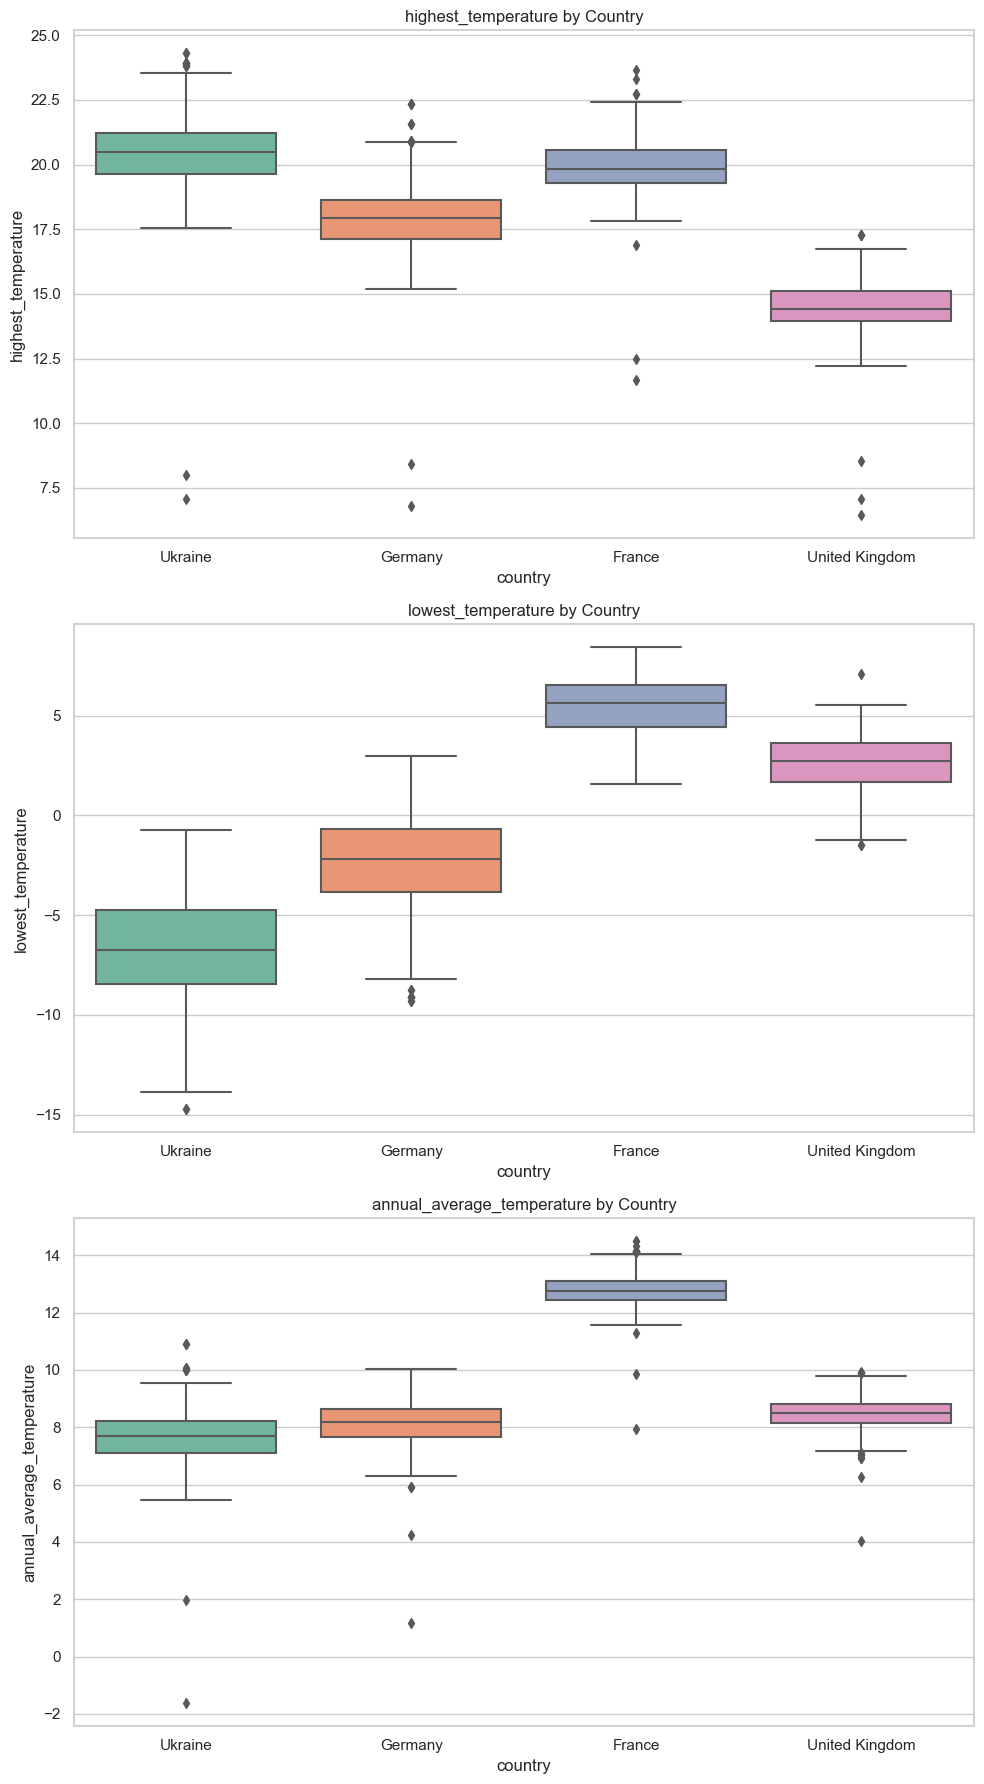

In [61]:
box_plots(united_data, temperature_categories, country_list)

In [65]:
def country_plotter(df, temperature_categories, country_list):
    # Create scatter plots and trendlines for each category on the same plot, one plot per country
    sns.set(style="whitegrid")
    categories_to_plot = list(temperature_categories.keys())
    
    num_countries = len(country_list)
    
    for country in country_list:
        plt.figure(figsize=(8, 4))  # Reduce the figure size to fit in two columns
        plt.title(f'Temperature Trends for {country}')
        
        for category, color in temperature_categories.items():
            country_data = df[df['country'] == country]
            sns.scatterplot(x='year', y=category, data=country_data, label=f'{category}', color=color)
            sns.regplot(x='year', y=category, data=country_data, color=color, scatter=False)
        
        plt.legend(loc='best')
        plt.tight_layout()
    
    plt.show()

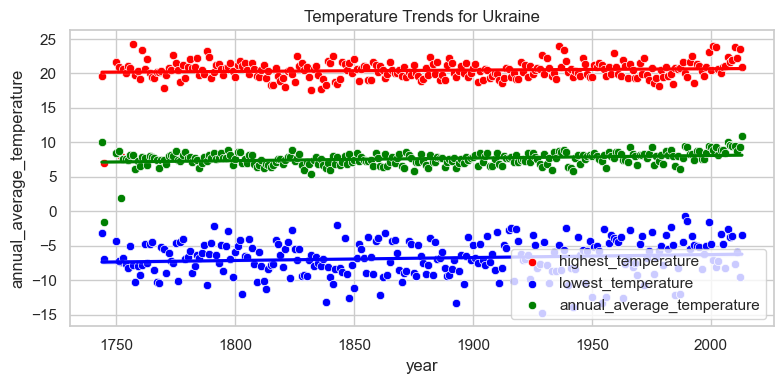

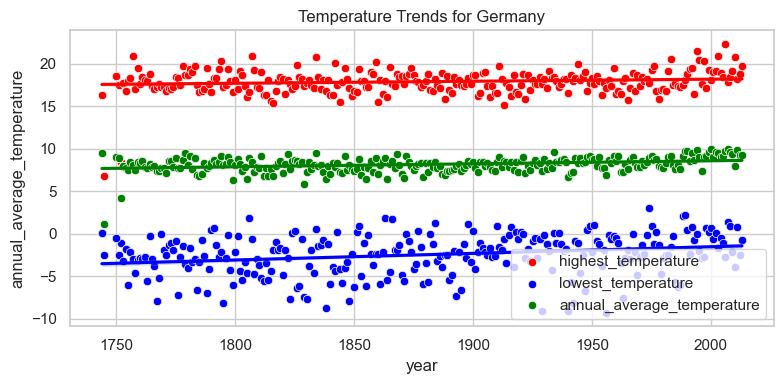

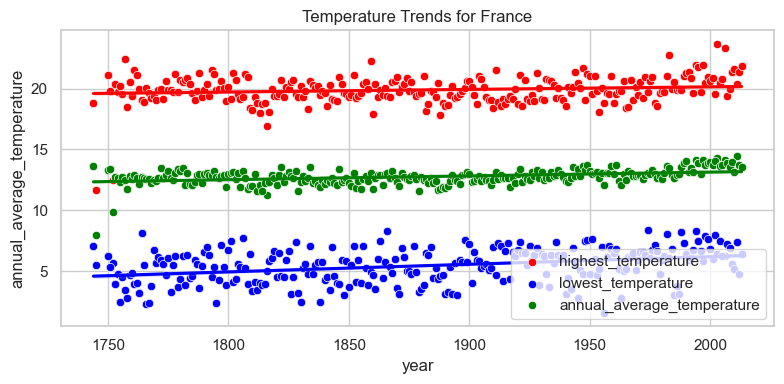

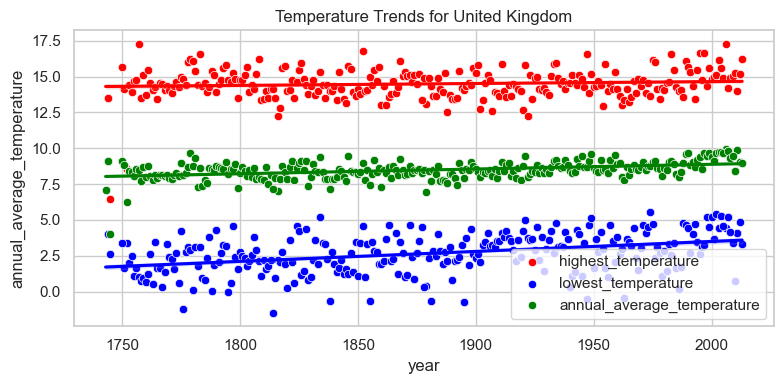

In [66]:
country_plotter(united_data, temperature_categories, country_list)

In [67]:
def remove_outliers(df, country_list, temperature_categories):
    united_data = pd.DataFrame()
    for country in country_list:
        for category in temperature_categories:
            q1 = df[(df['country'] == country)][category].quantile(0.25)
            q3 = df[(df['country'] == country)][category].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            country_data = df[(df['country'] == country) & (df[category] >= lower_bound) & (df[category] <= upper_bound)]
            united_data = pd.concat([united_data, country_data])
    return united_data

def train_linear_regression(df, country, temperature_categories):
    regressors = {}
    
    for category in temperature_categories:
        regressor = LinearRegression()
        country_subset = df[df['country'] == country]
        X_train = country_subset[['year']]
        y_train = country_subset[category]
        
        try:
            regressor.fit(X_train, y_train)
            regressors[category] = regressor
        except Exception:
            pass
    
    return regressors

def test_linear_regression(regressors, df, temperature_categories, country_list):
    for country in country_list:
        country_data = df[df['country'] == country]
        X_test = country_data[['year']]
        print(f'Temperature Predictions for {country}:')
        for category in temperature_categories:
            if category in regressors:
                y_pred = regressors[category].predict(X_test)
                print(f'{category}:')
                print(y_pred)

def linear_regression_protocol(regressors, df, temperature_categories, country_list):
    for country in country_list:
        country_data = df[df['country'] == country]
        X_test = country_data[['year']]
        print(f'Protocol for {country}:')
        for category in temperature_categories:
            if category in regressors:
                y_pred = regressors[category].predict(X_test)
                actual_values = country_data[category].values
                diff = actual_values - y_pred
                mse = (diff ** 2).mean()
                rmse = mse ** 0.5
                print(f'{category} - RMSE: {rmse:.2f}')

def create_linear_regression_plots(regressors, df, temperature_categories, country_list):
    sns.set(style="whitegrid")
    for country in country_list:
        country_data = df[df['country'] == country]
        X_test = country_data[['year']]
        for category in temperature_categories:
            if category in regressors:
                y_pred = regressors[category].predict(X_test)
                plt.figure(figsize=(10, 4))
                plt.title(f'Predictions for {category} in {country}')
                sns.lineplot(x=country_data['year'], y=y_pred, label='Predicted', color='red')
                sns.lineplot(x=country_data['year'], y=country_data[category], label='Actual', color='blue')
                plt.xlabel('Year')
                plt.ylabel(category)
                plt.legend()
                plt.tight_layout()
                plt.show()

In [69]:
united_data = remove_outliers(united_data, country_list, list(temperature_categories.keys()))


In [70]:
united_data.head

<bound method NDFrame.head of               country  year  highest_temperature  lowest_temperature  \
42941         Ukraine  1744               19.673              -3.092   
42943         Ukraine  1750               21.606              -4.372   
42944         Ukraine  1751               20.916              -7.272   
42946         Ukraine  1753               20.610              -6.765   
42947         Ukraine  1754               20.068              -7.715   
...               ...   ...                  ...                 ...   
43627  United Kingdom  2008               14.935               4.175   
43628  United Kingdom  2009               15.040               3.379   
43629  United Kingdom  2010               15.245               0.711   
43631  United Kingdom  2012               15.152               4.845   
43632  United Kingdom  2013               16.260               3.351   

       annual_average_temperature  
42941                    9.997125  
42943                    8.390818

In [71]:
regressors = train_linear_regression(united_data, 'Ukraine', list(temperature_categories.keys()))


In [72]:
# Test the regressors and print protocol
test_linear_regression(regressors, united_data, list(temperature_categories.keys()), country_list)
linear_regression_protocol(regressors, united_data, list(temperature_categories.keys()), country_list)


Temperature Predictions for Ukraine:
highest_temperature:
[20.28960152 20.29708419 20.2983313  ... 20.62133322 20.62258033
 20.62382744]
lowest_temperature:
[-7.38245881 -7.35625156 -7.35188368 ... -6.22060383 -6.21623595
 -6.21186808]
annual_average_temperature:
[7.19138109 7.21166102 7.215041   ... 8.09045771 8.0938377  8.09721769]
Temperature Predictions for Germany:
highest_temperature:
[20.28960152 20.29708419 20.2983313  ... 20.62258033 20.62382744
 20.62507455]
lowest_temperature:
[-7.38245881 -7.35625156 -7.35188368 ... -6.21623595 -6.21186808
 -6.2075002 ]
annual_average_temperature:
[7.19138109 7.21166102 7.215041   ... 8.0938377  8.09721769 8.10059767]
Temperature Predictions for France:
highest_temperature:
[20.28960152 20.29708419 20.2983313  ... 20.62133322 20.62382744
 20.62507455]
lowest_temperature:
[-7.38245881 -7.35625156 -7.35188368 ... -6.22060383 -6.21186808
 -6.2075002 ]
annual_average_temperature:
[7.19138109 7.21166102 7.215041   ... 8.09045771 8.09721769 8.100

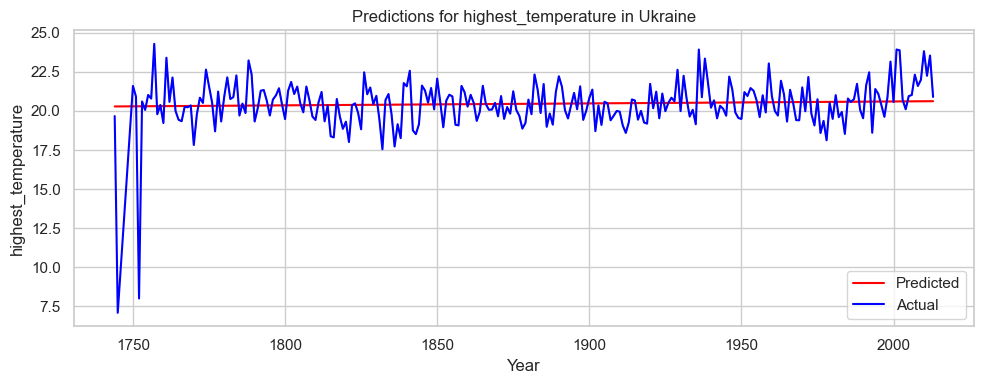

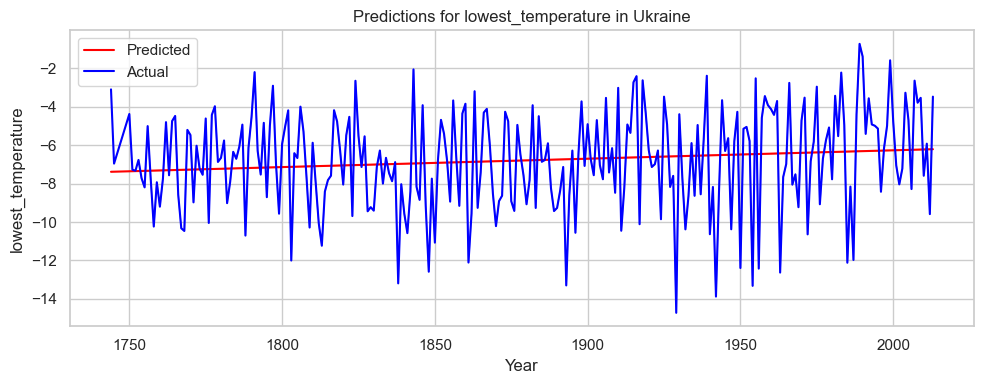

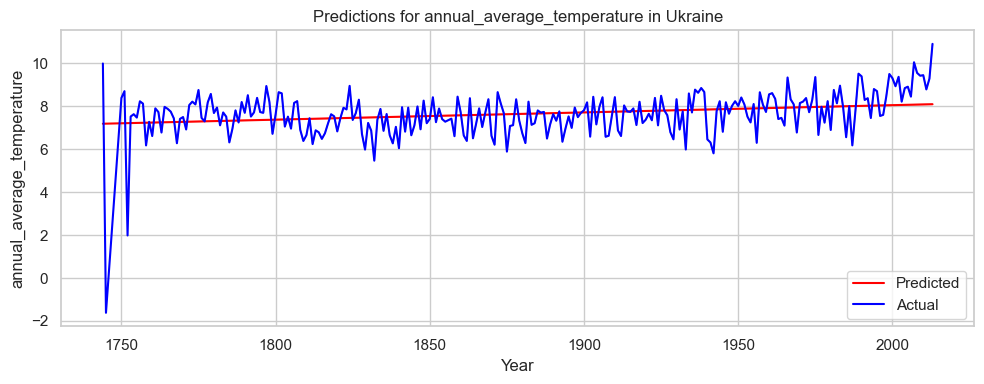

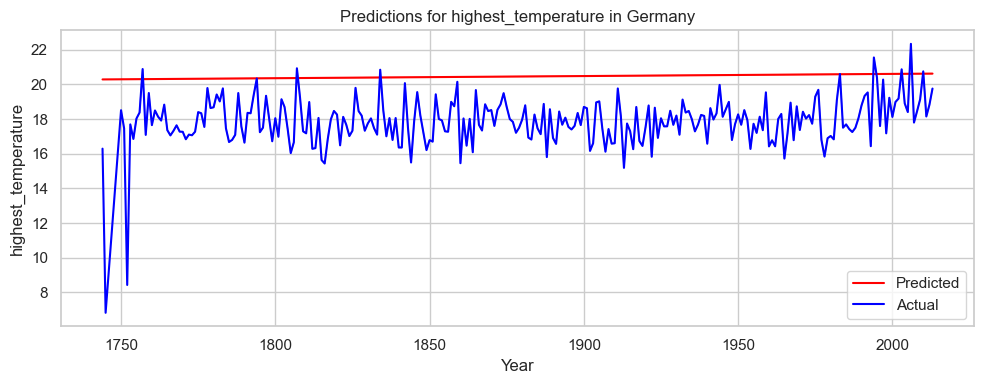

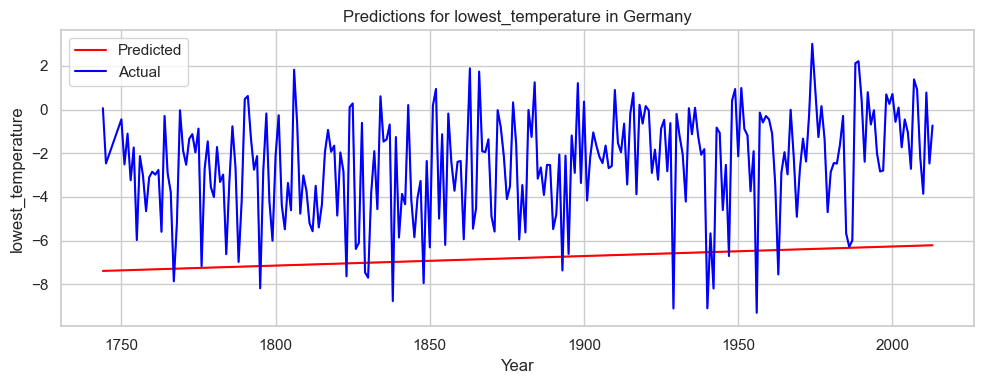

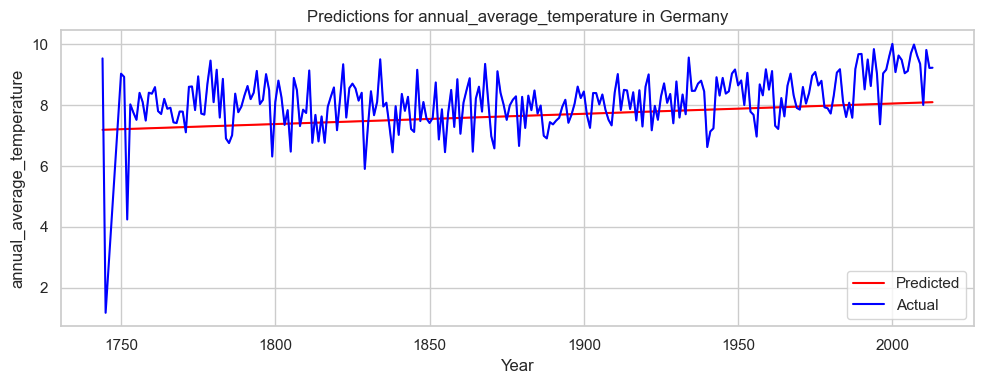

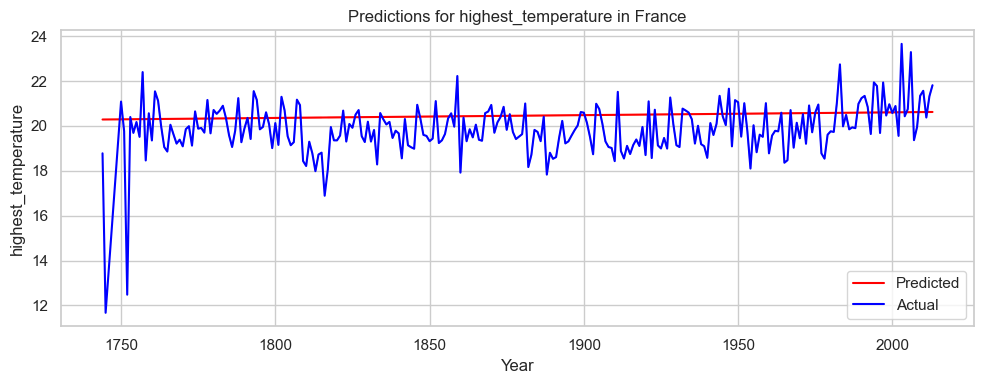

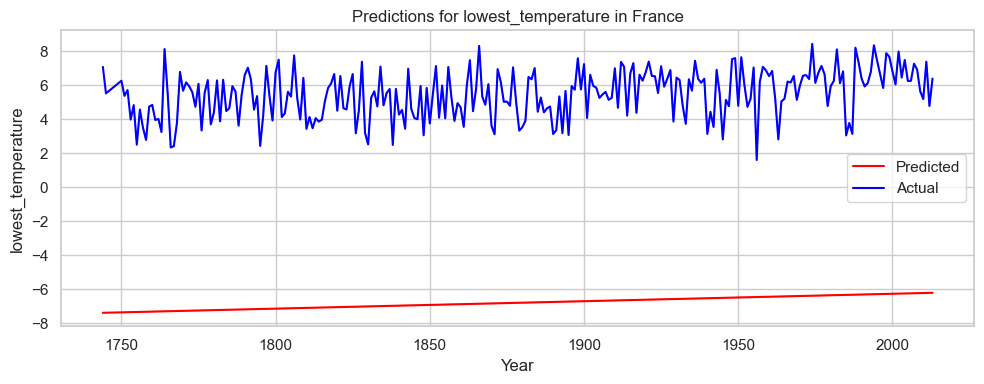

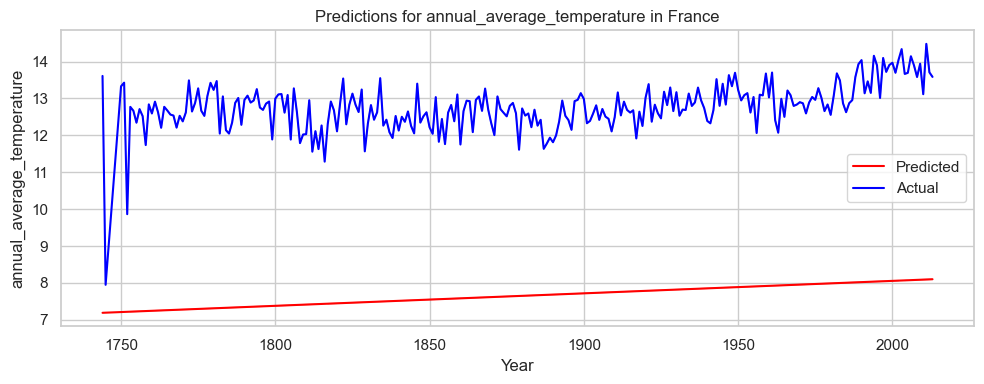

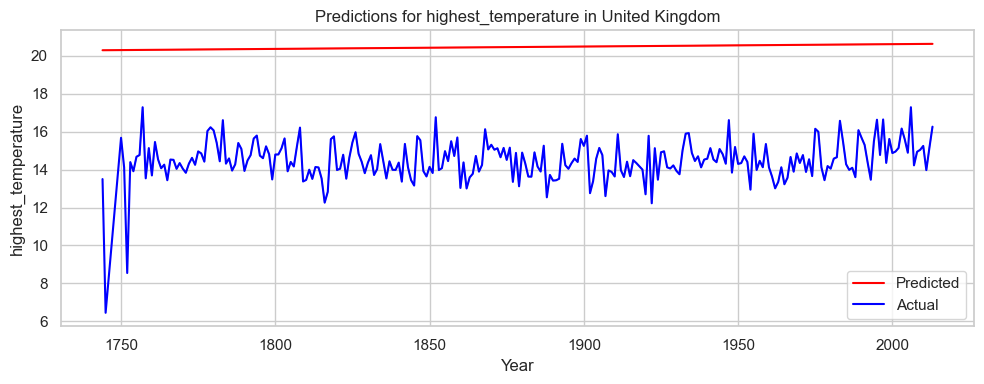

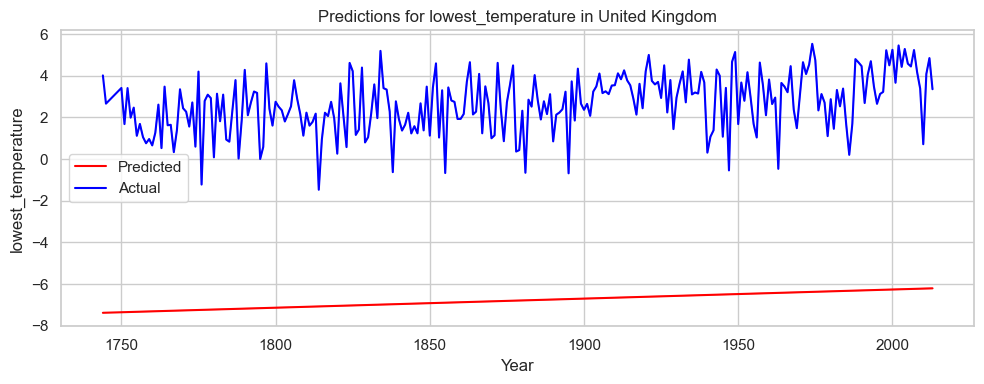

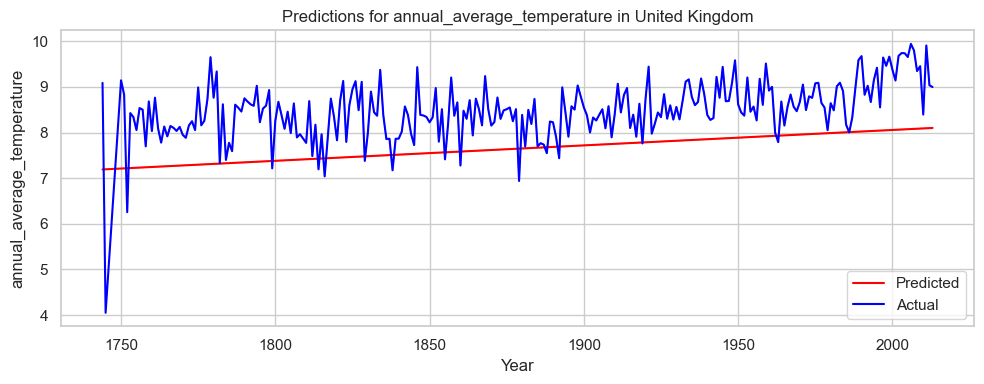

In [73]:
# Create linear regression plots
create_linear_regression_plots(regressors, united_data, list(temperature_categories.keys()), country_list)

Prediction for next 50 years